In [15]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

df = pd.read_csv("Credit_Scoring.csv")
df.info()
df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149992 entries, 0 to 149991
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            149992 non-null  int64  
 1   SeriousDlqin2yrs                      149992 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  149992 non-null  float64
 3   age                                   149992 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  149992 non-null  int64  
 5   DebtRatio                             149992 non-null  float64
 6   MonthlyIncome                         120262 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       149992 non-null  int64  
 8   NumberOfTimes90DaysLate               149992 non-null  int64  
 9   NumberRealEstateLoansOrLines          149992 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  149992 non-null  int64  
 11  

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
149987,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149988,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149989,149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149990,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0
149991,150000,0,0.850283,64,0,0.249908,8158.0,8,0,2,0,0.0


In [10]:
#Kiểm tra dữ liệu khuyết thiếu

df.isna()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,False,False,False,False,False,False,True,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
149987,False,False,False,False,False,False,False,False,False,False,False,False
149988,False,False,False,False,False,False,False,False,False,False,False,False
149989,False,False,False,False,False,False,True,False,False,False,False,False
149990,False,False,False,False,False,False,False,False,False,False,False,False


In [19]:
#Thực hiện xử lý giá trị khuyết thiếu: Thay thế giá trị khuyết thiếu bằng giá trị nội suy theo các cột
df1 = df.interpolate(axis=1)
df1.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,9.0,0.0,0.116951,27.0,0.0,46.000000,24.0,2.0,0.0,0.0,0.0,0.0
1,10.0,0.0,0.189169,57.0,0.0,0.606291,23684.0,9.0,0.0,4.0,0.0,2.0
2,11.0,0.0,0.644226,30.0,0.0,0.309476,2500.0,5.0,0.0,0.0,0.0,0.0
3,12.0,0.0,0.018798,51.0,0.0,0.531529,6501.0,7.0,0.0,2.0,0.0,2.0
4,13.0,0.0,0.010352,46.0,0.0,0.298354,12454.0,13.0,0.0,2.0,0.0,2.0


In [20]:
#Thực hiện xử lý giá trị khuyết thiếu: Thay thế giá trị khuyết thiếu bằng giá trị 0

df2 = df.fillna(0)
df2.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,9,0,0.116951,27,0,46.000000,0.0,2,0,0,0,0.0
1,10,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0
2,11,0,0.644226,30,0,0.309476,2500.0,5,0,0,0,0.0
3,12,0,0.018798,51,0,0.531529,6501.0,7,0,2,0,2.0
4,13,0,0.010352,46,0,0.298354,12454.0,13,0,2,0,2.0


<AxesSubplot:>

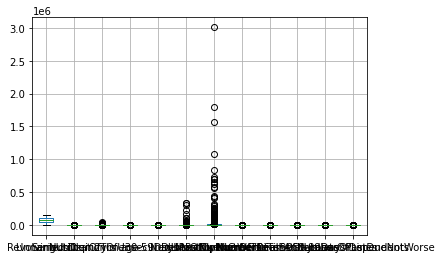

In [21]:
#Vẽ biểu đồ boxplot, biểu đồ phân bố dữ liệu cho các cột

df2.boxplot()

<AxesSubplot:>

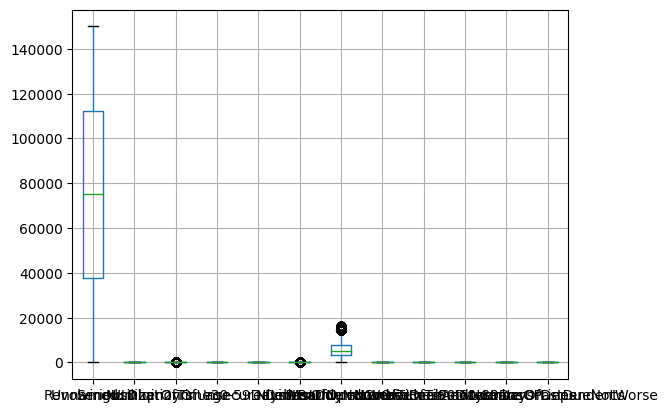

In [28]:
#Loại bỏ giá trị ngoại lai

Q1 = df2.quantile(0.25)
Q3 = df2.quantile(0.75)
IQR = Q3-Q1
df3 = df2[~((df2 < (Q1 - 1.5 * IQR)) | (df2 > (Q3 + 1.5 * IQR))).any(axis=1)]
df3.boxplot()

In [63]:
cut_data4 = pd.qcut(df3['age'],4)
pd.value_counts(cut_data4)

(20.999, 41.0]    19810
(41.0, 53.0]      19746
(53.0, 64.0]      19535
(64.0, 96.0]      18150
Name: age, dtype: int64

In [64]:
cut_data5 = pd.qcut(df3['age'],5)
pd.value_counts(cut_data5)

(38.0, 49.0]      16954
(20.999, 38.0]    15625
(57.0, 66.0]      15453
(66.0, 96.0]      15346
(49.0, 57.0]      13863
Name: age, dtype: int64

In [65]:
cut_data6 = pd.qcut(df3['age'],6)
pd.value_counts(cut_data6)

(45.0, 53.0]      13756
(20.999, 36.0]    13070
(60.0, 68.0]      12919
(36.0, 45.0]      12730
(68.0, 96.0]      12694
(53.0, 60.0]      12072
Name: age, dtype: int64

In [68]:
#Chia dữ liệu ở các cột age và MonthlyIncome thành 5 nhóm theo các khoảng: 0, 30, 40, 50, 80, 150 và đếm số lượng phần tử ở mỗi nhóm.

group_names1 = ['Rất trẻ', 'Trẻ', 'Trung niên', 'Già','Rất già']
bins = [0,30,40,50,80,150]
cut_age = pd.cut(df3['age'],bins,labels = group_names1)
print(pd.value_counts(cut_age))

group_names2 = ['Rất thấp', 'Thấp', 'Trung bình', 'Cao','Rất cao']
cut_MonthlyIncome = pd.cut(df3['MonthlyIncome'],bins,labels = group_names2)
print(pd.value_counts(cut_MonthlyIncome))

Già           39968
Trung niên    15951
Trẻ           12384
Rất trẻ        6043
Rất già        2895
Name: age, dtype: int64
Rất thấp      41
Rất cao       15
Thấp           1
Cao            1
Trung bình     0
Name: MonthlyIncome, dtype: int64
